In [1]:
## https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
## https://gist.github.com/fchollet
meanloss = []
valloss = []

accuA = []
valaccuA = []

In [2]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
for i in range(5):
    # define cnn model
    def define_model():
        model = Sequential()
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(1, activation='sigmoid'))
        # compile model
        opt = SGD(learning_rate=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        return model

    # plot diagnostic learning curves
    def summarize_diagnostics(history):
        f = pyplot.figure(figsize=(10,10))
        # plot loss
        ax = f.add_subplot(211)
        ax.title.set_text('Cross Entropy Loss')
        ax.plot(history.history['loss'], color='blue', label='train')
        ax.plot(history.history['val_loss'], color='orange', label='test')
        ax.legend()
        # plot accuracy
        ax2 = f.add_subplot(212)
        ax2.title.set_text('Classification Accuracy')
        ax2.plot(history.history['accuracy'], color='blue', label='train')
        ax2.plot(history.history['val_accuracy'], color='orange', label='test')
        ax2.legend()
        # save plot to file
#         filename = sys.argv[0].split('/')[-1]
        pyplot.savefig('loos128_128_plot.png')
        pyplot.close()

    # run the test harness for evaluating a model
    def run_test_harness():
        # define model
        model = define_model()
        # create data generator
        datagen = ImageDataGenerator(rescale=1.0/255.0)
        # prepare iterators
        train_it = datagen.flow_from_directory('split/train/',
            class_mode='binary', batch_size=64, target_size=(200, 200))
        test_it = datagen.flow_from_directory('split/test/',
            class_mode='binary', batch_size=64, target_size=(200, 200))
        # fit model
        history = model.fit(train_it, steps_per_epoch=len(train_it),
            validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
        # evaluate model
        _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
        print(i)
        print('> %.3f' % (acc * 100.0))
        print(f'loss mean = {history.history["loss"]}')
        print("*************************************")        
        print(f'loss valmean = {history.history["val_loss"]}')
        
        valloss.append(history.history["val_loss"])
        meanloss.append(history.history["loss"])
        
        accuA.append(history.history["accuracy"])
        valaccuA.append(history.history["val_accuracy"])
        # learning curves
        summarize_diagnostics(history)

    # entry point, run the test harness
    run_test_harness()
    print("-------------------------------\n")

Found 280 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
0
> 63.333
loss mean = [1.446256399154663, 0.7041321992874146, 0.6543602347373962, 0.6297197341918945, 0.6063256859779358, 0.5857000350952148, 0.619277834892273, 0.5824217200279236, 0.5572399497032166, 0.5375409126281738, 0.4836338460445404, 0.46181249618530273, 0.44763046503067017, 0.4584541320800781, 0.41117939352989197, 0.3891289532184601, 0.3609682321548462, 0.32651787996292114, 0.30955854058265686, 0.3109056055545807]
*************************************
loss valmean = [0.6822930574417114, 0.6534100770950317, 0.6476319432258606, 0.6229718923568726, 0.6077830195426941, 0.5816994905471802, 0.5867551565170288, 0.5843228101730347, 0.5899475812911987, 0.5358070135116577, 0.537949800491333, 0.49876371026039124, 0.4911101162433624, 0.48888155817985535, 0.5891735553741455, 0.5406437516212463, 0.5127248167991638, 0.5268100500106812, 0.5419992208480835, 0.7623873353004456]
-------------------------------

Foun

In [3]:
import numpy as np
mloss = [float(sum(l))/len(l) for l in zip(*meanloss)]
print(meanloss)

mvloss = [float(sum(l))/len(l) for l in zip(*valloss)]
print(valloss)

[[1.446256399154663, 0.7041321992874146, 0.6543602347373962, 0.6297197341918945, 0.6063256859779358, 0.5857000350952148, 0.619277834892273, 0.5824217200279236, 0.5572399497032166, 0.5375409126281738, 0.4836338460445404, 0.46181249618530273, 0.44763046503067017, 0.4584541320800781, 0.41117939352989197, 0.3891289532184601, 0.3609682321548462, 0.32651787996292114, 0.30955854058265686, 0.3109056055545807], [0.897460401058197, 0.6406445503234863, 0.6237491965293884, 0.6151143312454224, 0.5705330967903137, 0.48379385471343994, 0.4560999870300293, 0.42256489396095276, 0.3904457688331604, 0.3781869113445282, 0.3516705632209778, 0.32240307331085205, 0.3138786852359772, 0.27873921394348145, 0.2642199993133545, 0.23963622748851776, 0.20799173414707184, 0.20723897218704224, 0.16570210456848145, 0.15603555738925934], [6.633896350860596, 1.8613717555999756, 0.6918570399284363, 0.6885235905647278, 0.6820540428161621, 0.679772138595581, 0.6701130270957947, 0.6591374278068542, 0.6521556377410889, 0.650

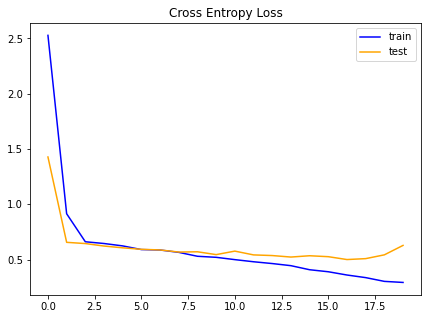

In [4]:
pyplot.figure(figsize=(7,5))
pyplot.title('Cross Entropy Loss')
pyplot.plot(mloss, color='blue', label='train')
pyplot.plot(mvloss, color='orange', label='test')
pyplot.legend()